In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline
import os
os.getcwd()

'D:\\Facultate\\Anul2\\Sem2\\AI\\Lab02'

In [2]:
def edge_to_remove(graph):
        G_dict = nx.edge_betweenness_centrality(graph)
        edge =()
        for key,value in sorted(G_dict.items(),key=lambda item: item[1],reverse = True):
            edge = key
            break
        return edge
    
def E(G: nx.Graph):
    # returns the total number of edges in a graph
    
    return G.number_of_edges()

def sum_of_degrees(G: nx.Graph):
    # returns the sum of the degrees for each node in a graph
    
    degrees_sum = 0
    for node in G.nodes:
        degrees_sum += G.degree(node)
        
    return degrees_sum
            
def modularity(G: nx.Graph):
    # returns the modularity metric for a graph 
    # Q ∈ [-0.5, 1)
    
    Q = 0
    communities = nx.connected_components(G)
    for community in communities:
        G1 = G.subgraph(community)
        Q += E(G1) / E(G) - (sum_of_degrees(G1) / (2*E(G))) ** 2 
        
            
    return Q

def color_communities(G: nx.Graph):
    # returns a color map representing the colors for each nodes 
    # the color of each node is given by the community it is in

    _G = G      # copy of the initial graph 
    
    color = 0
    communities = nx.connected_components(_G)
    for community in communities:
        for node in community:
            G.nodes[node]["color"] = color
            
        color += 1
    
    color_map = []
    for node_data in _G.nodes(data=True):
        color = node_data[1]["color"]
        color_map.append(color)
        
    return color_map

def girvan_newman(graph):
    G = graph
    max_modularity = 0
    while(modularity(G)<=0.3):
        max_modularity = modularity(G)
        G.remove_edge(edge_to_remove(G)[0],edge_to_remove(G)[1])
        
    
    print(max_modularity)
    return G

In [3]:
def community_detection(G: nx.Graph):
    # performs a greedy community detection using the Girvan Newman algorithm and a metric represented 
    # by the modularity of the graph to know when to stop
    
    epsilon = np.finfo(np.float32).eps
    while modularity(G) <= 0.3 + epsilon:      
        edge_betweenness = nx.edge_betweenness_centrality(G).items()
        edge_to_remove = sorted(edge_betweenness, key=lambda item: item[1], reverse=True)[0][0]
        
        A, B = edge_to_remove[0], edge_to_remove[1]
        G.remove_edge(A, B)
    
    color_map = color_communities(G)
    return color_map


def show_graph(G: nx.Graph, color_map: list = []):
    # displays a graph to the screen 
    # if no color_map is given, all nodes will use the same color
    
    if color_map == []:
        color_map = [0 for i in range(0, G.number_of_nodes())]
    
    pos = nx.spring_layout(G, k=0.15, iterations=20) 
    nx.draw_networkx(G, pos, node_size=600, node_color=color_map, arrows=False, with_labels=True)    
    plt.show()


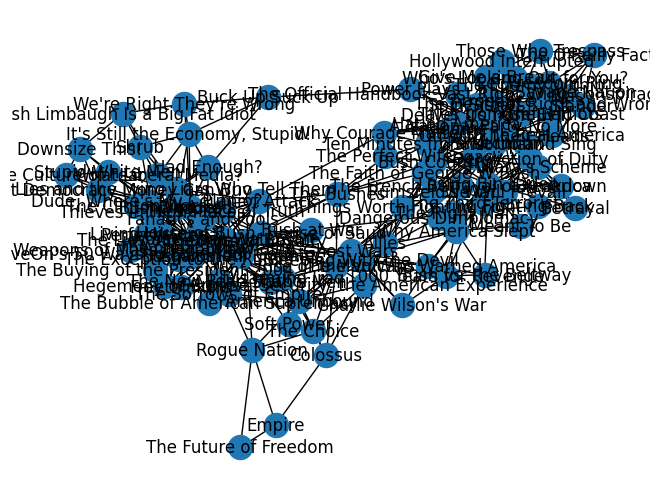

In [4]:
G = nx.Graph()
path = "krebs.gml"

G = nx.read_gml(path)
nx.draw(G,with_labels = True)

In [5]:
c = girvan_newman(G.copy())

0.0


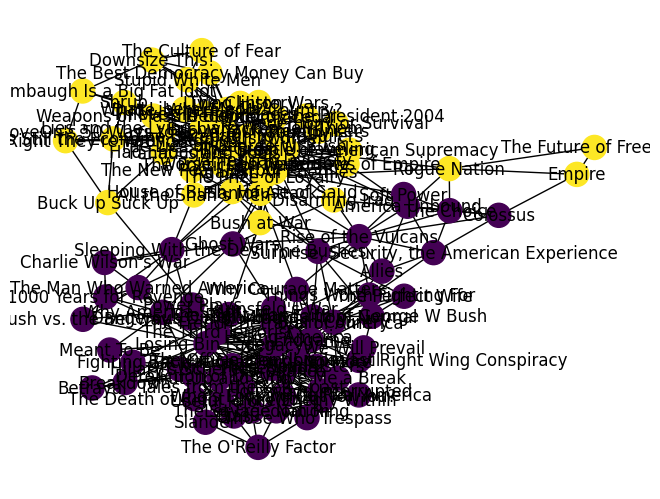

In [6]:
color_map = color_communities(c)
        
nx.draw(G, node_color=color_map,with_labels=True)
plt.show()

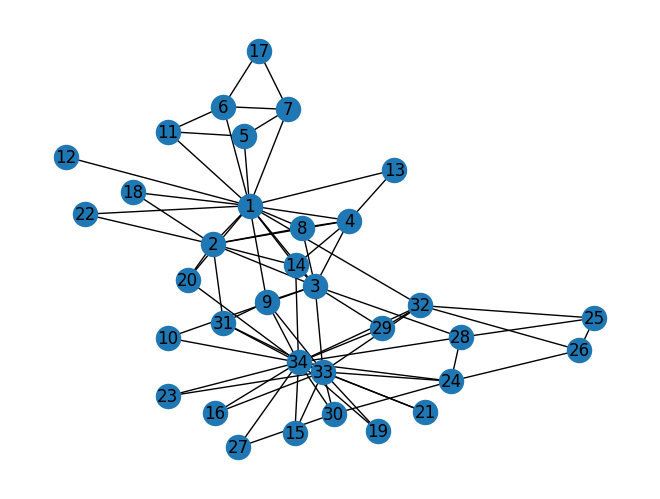

In [7]:
G2 = nx.Graph()
path2 = "karate.gml"

G2 = nx.read_gml(path2,label="id")
nx.draw(G2,with_labels = True)


0.0


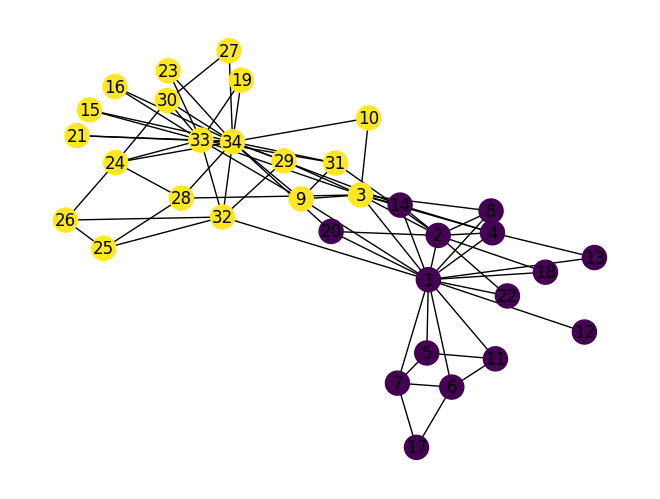

In [8]:
c2 = girvan_newman(G2.copy())

color_map = color_communities(c2)
        
nx.draw(G2, node_color=color_map,with_labels=True)
plt.show()

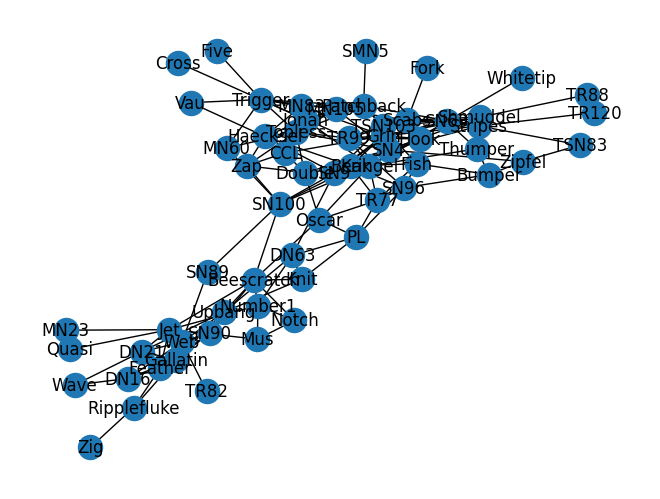

In [9]:
G3 = nx.Graph()
path3 = "dolphins.gml"

G3 = nx.read_gml(path3)
nx.draw(G3,with_labels = True)

0.0


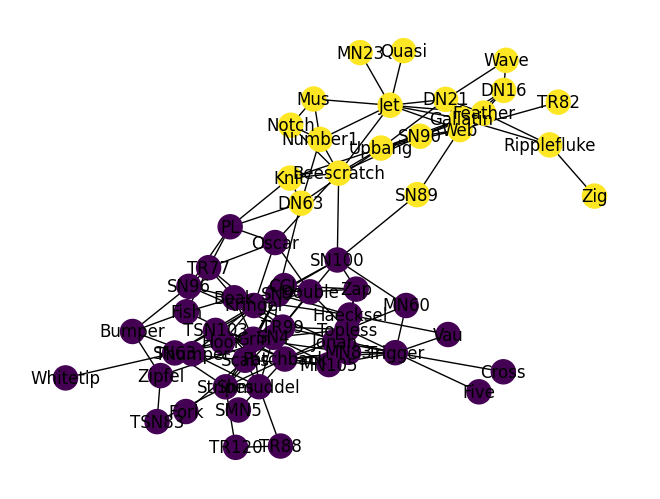

In [10]:
c3 = girvan_newman(G3.copy())

color_map = color_communities(c3)
        
nx.draw(G3, node_color=color_map,with_labels=True)
plt.show()

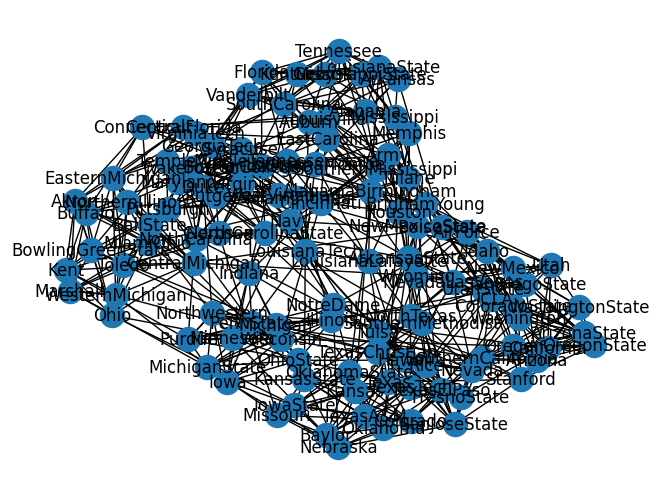

In [11]:
G4 = nx.Graph()
path4 = "football.gml"

G4 = nx.read_gml(path4)
nx.draw(G4,with_labels = True)

0.0


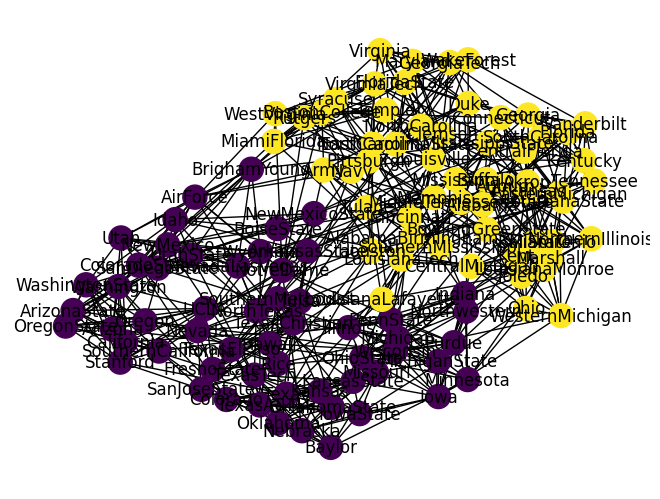

In [12]:
c4 = girvan_newman(G4.copy())

color_map = color_communities(c4)
        
nx.draw(G4, node_color=color_map,with_labels=True)
plt.show()

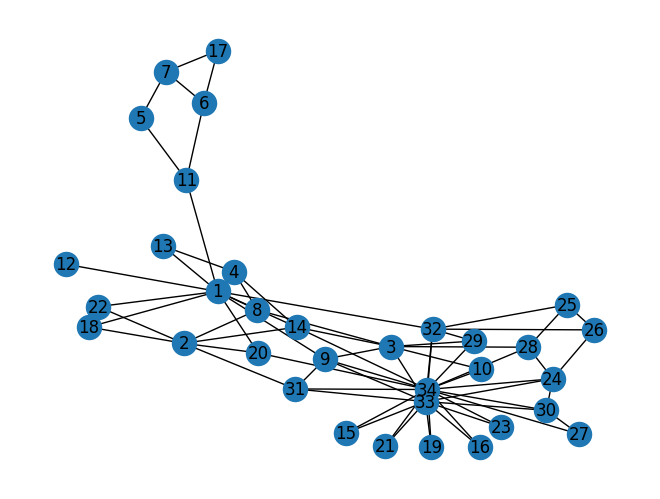

In [12]:
G5 = nx.Graph()
path5 = "cars.gml"

G5 = nx.read_gml(path5,label="id")
nx.draw(G5,with_labels = True)

0.17737167428110717


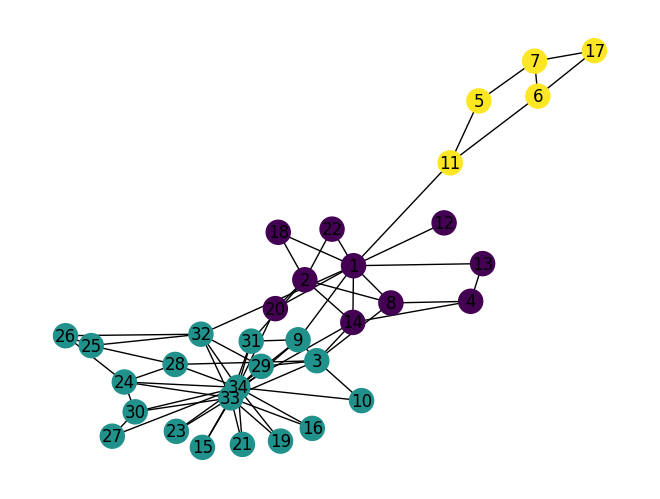

In [13]:
c5 = girvan_newman(G5.copy())

color_map = color_communities(c5)
        
nx.draw(G5, node_color=color_map,with_labels=True)
plt.show()

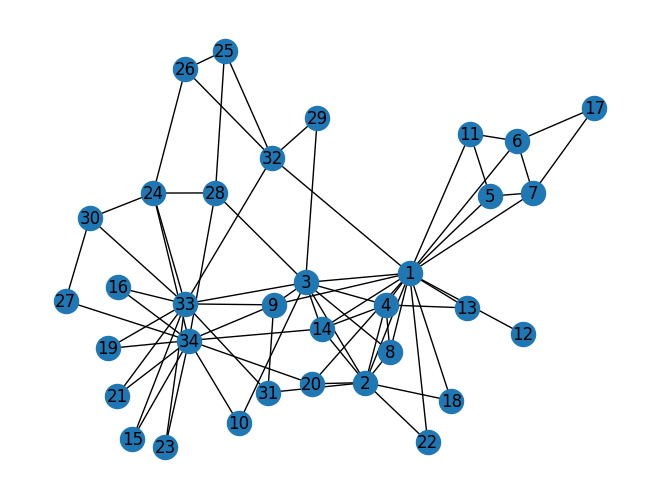

In [15]:
G6 = nx.Graph()
path6 = "kudo.gml"

G6 = nx.read_gml(path6,label="id")
nx.draw(G6,with_labels = True)

0.0


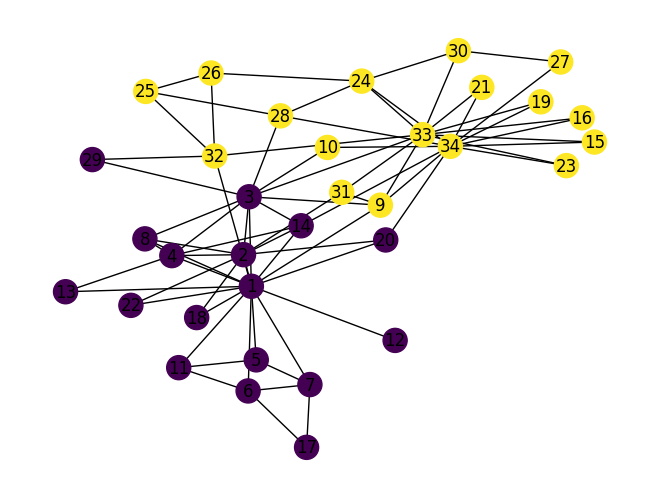

In [16]:
c6 = girvan_newman(G6.copy())

color_map = color_communities(c6)
        
nx.draw(G6, node_color=color_map,with_labels=True)
plt.show()

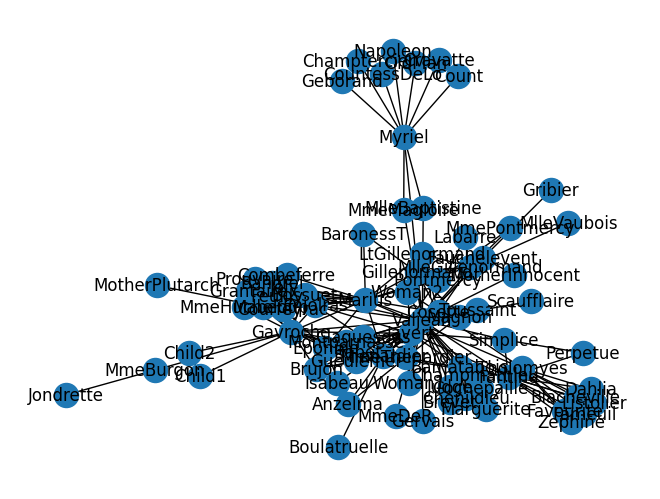

In [17]:
G7 = nx.Graph()
path7 = "lesmiserables.gml"

G7 = nx.read_gml(path7)
nx.draw(G7,with_labels = True)

0.29930336110313127


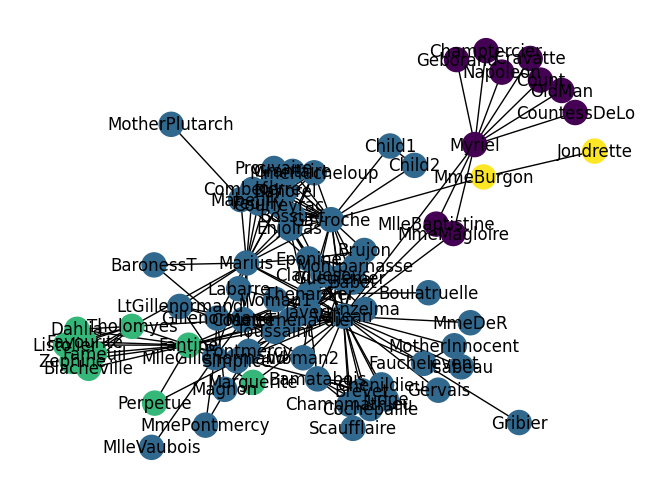

In [18]:
c7 = girvan_newman(G7.copy())

color_map = color_communities(c7)
        
nx.draw(G7, node_color=color_map,with_labels=True)
plt.show()

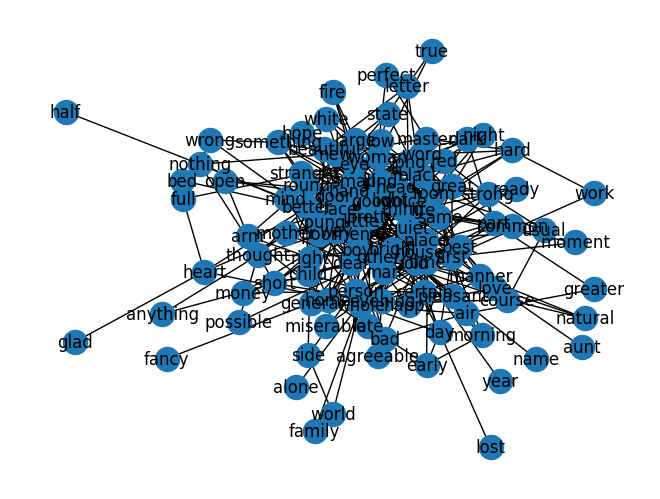

In [19]:
G8 = nx.Graph()
path8 = "word.gml"

G8 = nx.read_gml(path8)
nx.draw(G8,with_labels = True)

0.29931640625


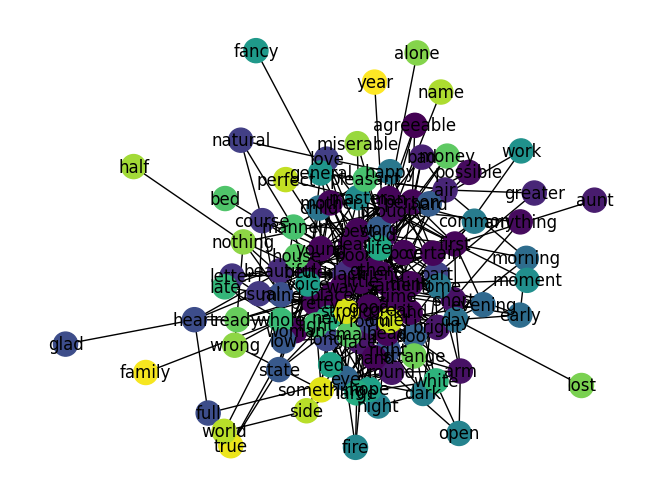

In [20]:
c8 = girvan_newman(G8.copy())

color_map = color_communities(c8)
        
nx.draw(G8, node_color=color_map,with_labels=True)
plt.show()

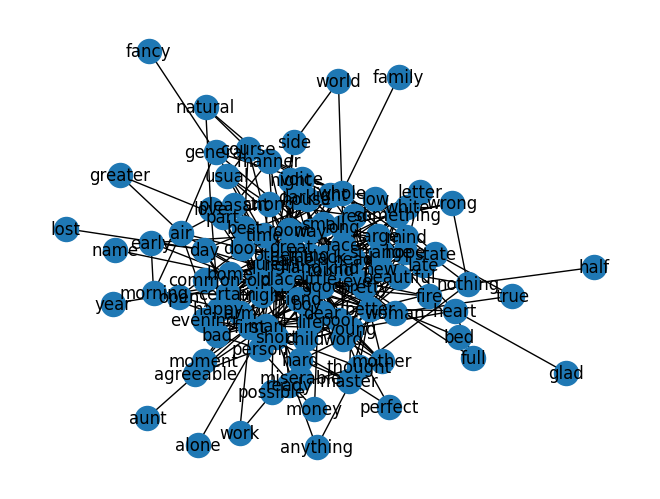

In [5]:
G9 = nx.Graph()
path9 = "adjnoun.gml"

G9 = nx.read_gml(path9)
nx.draw(G9,with_labels = True)

0.29931640625


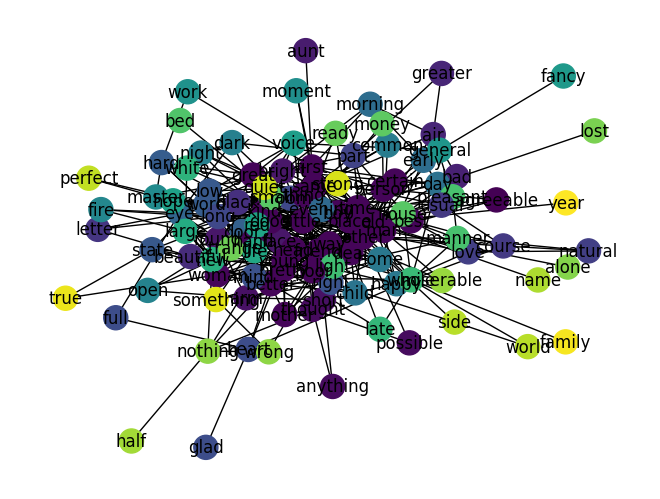

In [6]:
c9 = girvan_newman(G9.copy())

color_map = color_communities(c9)
        
nx.draw(G9, node_color=color_map,with_labels=True)
plt.show()

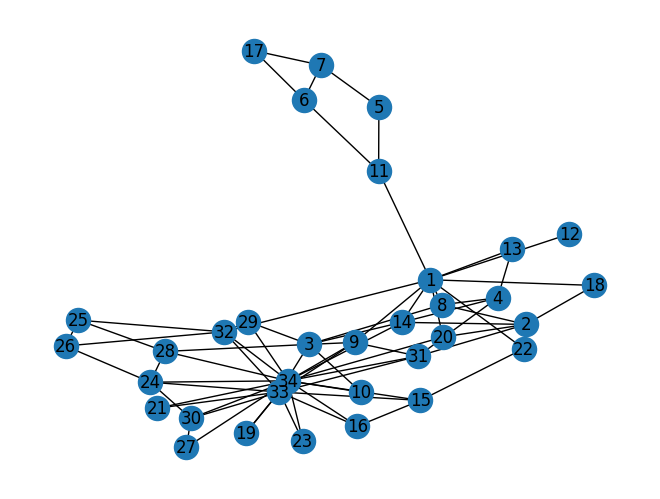

In [6]:
G10 = nx.Graph()
path10 = "pets.gml"

G10 = nx.read_gml(path10,label="id")
nx.draw(G10,with_labels = True)

0.17999999999999997


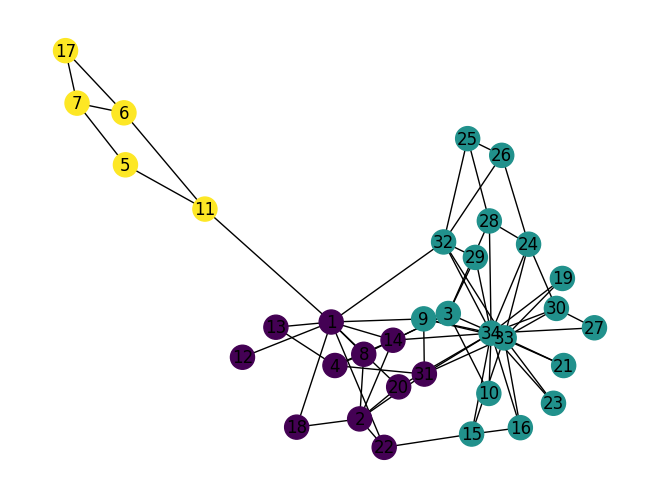

In [7]:
c10 = girvan_newman(G10.copy())

color_map = color_communities(c10)
        
nx.draw(G10, node_color=color_map,with_labels=True)
plt.show()